<a href="https://colab.research.google.com/github/ThienNguyen3001/Mini-project-ML/blob/main/Iris/Iris_mini_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Về dataset
Dữ liệu gồm 3 lớp với mỗi lớp có 50 mẫu, trong đó mỗi lớp đại diện cho một loại cây hoa iris.
- Thông tin thuộc tính:
  - Chiều dài lá đài (sepal length) tính bằng cm
  - Chiều rộng lá đài (sepal width) tính bằng cm
  - Chiều dài cánh hoa (petal length) tính bằng cm
  - Chiều rộng cánh hoa (petal width) tính bằng cm
  - Lớp: -- Setosa -- Versicolour -- Virginica

# Load modules

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
# Import dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
print(df.describe())
print(df.info())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             ----

# Tiền xử lý dữ liệu

In [4]:
# Check giá trị null theo phần trăm
for col in df.columns:
    null_percentage = df[col].isnull().sum() / len(df) * 100
    print(f"{col} có {null_percentage}% giá trị rỗng")

sepal length (cm) có 0.0% giá trị rỗng
sepal width (cm) có 0.0% giá trị rỗng
petal length (cm) có 0.0% giá trị rỗng
petal width (cm) có 0.0% giá trị rỗng
class có 0.0% giá trị rỗng


# Lập trình khám phá dữ liệu (EDA)

## Phân bổ

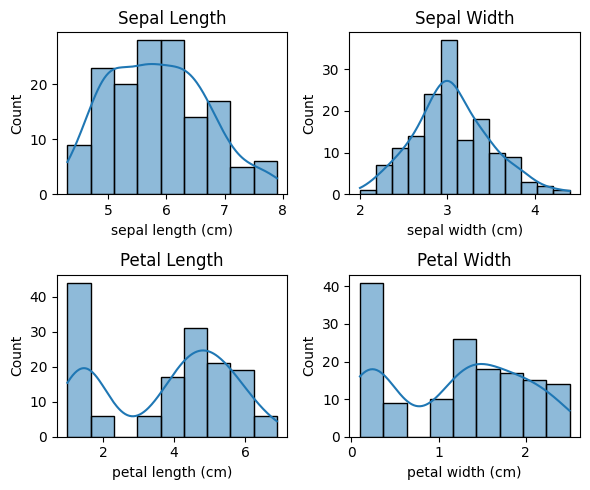

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

# Vẽ biểu đồ histplot
sns.histplot(data=df, x='sepal length (cm)', ax=axs[0, 0], kde = True)
sns.histplot(data=df, x='sepal width (cm)', ax=axs[0, 1], kde = True)
sns.histplot(data=df, x='petal length (cm)', ax=axs[1, 0], kde = True)
sns.histplot(data=df, x='petal width (cm)', ax=axs[1, 1], kde = True)

# Đặt tiêu đề
axs[0, 0].set_title('Sepal Length')
axs[0, 1].set_title('Sepal Width')
axs[1, 0].set_title('Petal Length')
axs[1, 1].set_title('Petal Width')

plt.tight_layout()

## So khớp từng cột

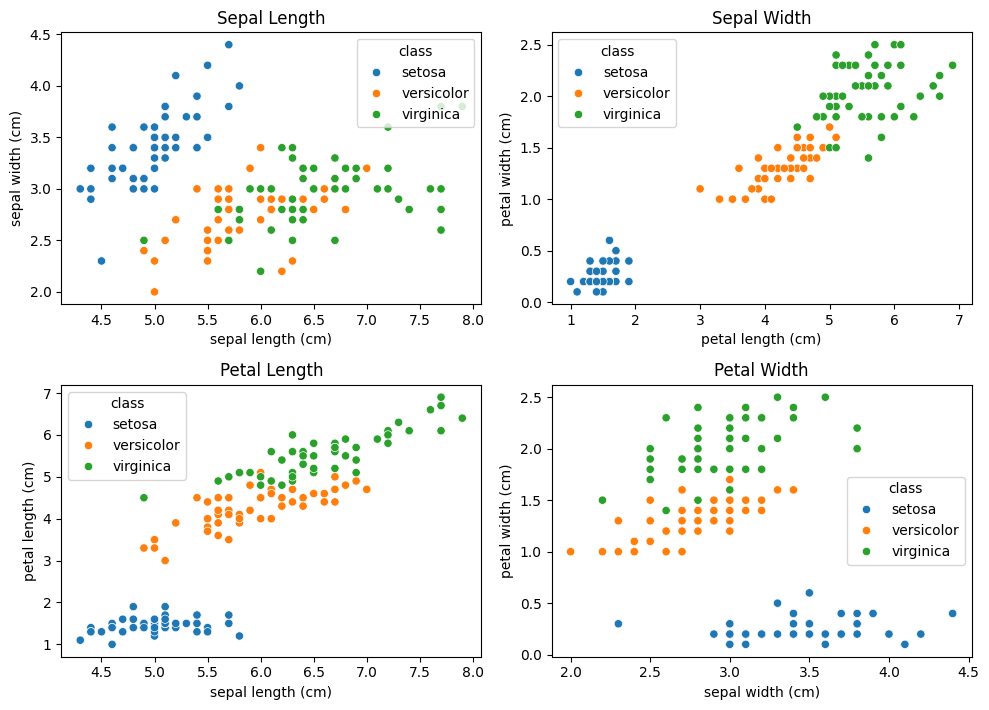

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Dùng scatter plot
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='class', ax=axs[0, 0])
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='class', ax=axs[0, 1])
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='class', ax=axs[1, 0])
sns.scatterplot(data=df, x='sepal width (cm)', y='petal width (cm)', hue='class', ax=axs[1, 1])

# Đặt tiêu đề
axs[0, 0].set_title('Sepal Length')
axs[0, 1].set_title('Sepal Width')
axs[1, 0].set_title('Petal Length')
axs[1, 1].set_title('Petal Width')

plt.tight_layout(rect=[0, 0, 1, 0.9])

## Ma trận tương quan

In [7]:
df.drop('class',axis = 1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

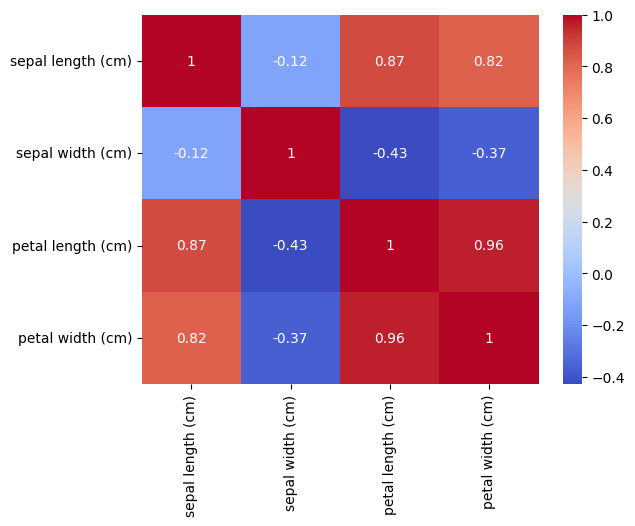

In [8]:
sns.heatmap(df.drop('class',axis = 1).corr(), annot=True, cmap='coolwarm')

## Encode label

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Train model

## Chuẩn bị data huấn luyện

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [12]:
X = df.drop('class',axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Hồi quy logistic

In [13]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)

In [24]:
print(classification_report(y_test, LR_pred))
print(balanced_accuracy_score(y_test, LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

0.9761904761904763


## KNN

In [26]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
KNN_pred = KNN_model.predict(X_test)

In [27]:
print(classification_report(y_test, KNN_pred))
print(balanced_accuracy_score(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.86      0.89        14
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45

0.9246031746031745


## Cây quyết định

In [17]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
DT_pred = DT_model.predict(X_test)

In [28]:
print(classification_report(y_test, DT_pred))
print(balanced_accuracy_score(y_test, DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.85      0.79      0.81        14
           2       0.77      0.83      0.80        12

    accuracy                           0.89        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.89      0.89      0.89        45

0.873015873015873


## Naive Bayes Classifiers

In [19]:
NBC_model = GaussianNB()
NBC_model.fit(X_train, y_train)
NBC_pred = NBC_model.predict(X_test)

In [29]:
print(classification_report(y_test, NBC_pred))
print(balanced_accuracy_score(y_test, NBC_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9523809523809524


## SVM

In [21]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [30]:
print(classification_report(y_test, svm_pred))
print(balanced_accuracy_score(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9484126984126985
